In [52]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv("Copy of Career Mode player datasets - FIFA 15-21.csv",sep=";", encoding='cp1252')

In [54]:
df.head()

,fifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,24/6/1987,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,5/2/1985,187,83,Portugal,Juventus,Italian Serie A,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,J. Oblak,Jan Oblak,27,7/1/1993,188,87,Slovenia,Atlético Madrid,Spain Primera Division,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,R. Lewandowski,Robert Lewandowski,31,21/8/1988,184,80,Poland,FC Bayern München,German 1. Bundesliga,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,Neymar Jr,Neymar da Silva Santos Júnior,28,5/2/1992,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [55]:
#Hago un panorama general para explorar un poco el dataset(cantidad de filas y columnas, nombre de las columnas, tipo de datos,

print(f'SHAPE:\n\n{df.shape}')
print(f'------------------\n')
print(f'COLUMNS:\n\n{df.columns}')
print(f'------------------\n')
print(f'COLUMNS DATA TYPE:\n\n{df.dtypes}')
print(f'------------------\n')
print(f'DESCRIBE:\n\n{df.describe().round(2)}')
print(f'------------------\n')
print(f'COUNT:\n\n{df.count()}')
print(f'------------------\n')
print(f'2 ROW SAMPLE:\n\n{df.sample(2)}')
print(f'------------------\n')

SHAPE:

(18944, 105)
------------------

COLUMNS:

Index(['fifa_id', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club_name', 'league_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=105)
------------------

COLUMNS DATA TYPE:

fifa_id        int64
short_name    object
long_name     object
age            int64
dob           object
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 105, dtype: object
------------------

DESCRIBE:

         fifa_id       age  height_cm  weight_kg  league_rank   overall  \
count   18944.00  18944.00   18944.00   18944.00     18719.00  18944.00   
mean   226242.40     25.23     181.19      75.02         1.36     65.68   
std     27171.09      4.70       6.83       7.06         0.74      7.00   
min        41.00     16.00     155.00      50.00         1.00    

In [56]:
fifa = df

In [57]:
#Cambio el formato de la columna dob ya que es una fecha
fifa["dob"]= pd.to_datetime(fifa["dob"])
fifa

,fifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-05-02,187,83,Portugal,Juventus,Italian Serie A,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,J. Oblak,Jan Oblak,27,1993-07-01,188,87,Slovenia,Atlético Madrid,Spain Primera Division,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-05-02,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,Colombian Liga Postobón,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,257710,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,250989,Wang Zhenghao,???,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,Chinese Super League,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


In [58]:
fifa.isnull().sum()

fifa_id       0
short_name    0
long_name     0
age           0
dob           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 105, dtype: int64

In [59]:
fifa.dropna()

,fifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [60]:
#Borro la columna defending_marking ya que tiene todos valores nulos
fifa = fifa.drop(columns = ['defending_marking'])
fifa.head()

,fifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-05-02,187,83,Portugal,Juventus,Italian Serie A,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,J. Oblak,Jan Oblak,27,1993-07-01,188,87,Slovenia,Atlético Madrid,Spain Primera Division,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-05-02,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [61]:
#Renombro la columna dob para que sea mas entendible
fifa21 = fifa.rename(columns = {"dob": "born_on"})
fifa21

,fifa_id,short_name,long_name,age,born_on,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-05-02,187,83,Portugal,Juventus,Italian Serie A,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,J. Oblak,Jan Oblak,27,1993-07-01,188,87,Slovenia,Atlético Madrid,Spain Primera Division,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-05-02,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,Colombian Liga Postobón,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,257710,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,250989,Wang Zhenghao,???,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,Chinese Super League,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


In [62]:
#Edades de los jugadores
Edades = fifa21["age"].unique().tolist()
Edades

[33,
 35,
 27,
 31,
 28,
 29,
 21,
 32,
 34,
 26,
 25,
 30,
 20,
 22,
 24,
 23,
 19,
 38,
 42,
 36,
 37,
 18,
 17,
 39,
 40,
 41,
 16,
 43,
 53]

Mean Age of All Players: 25.22582347972973


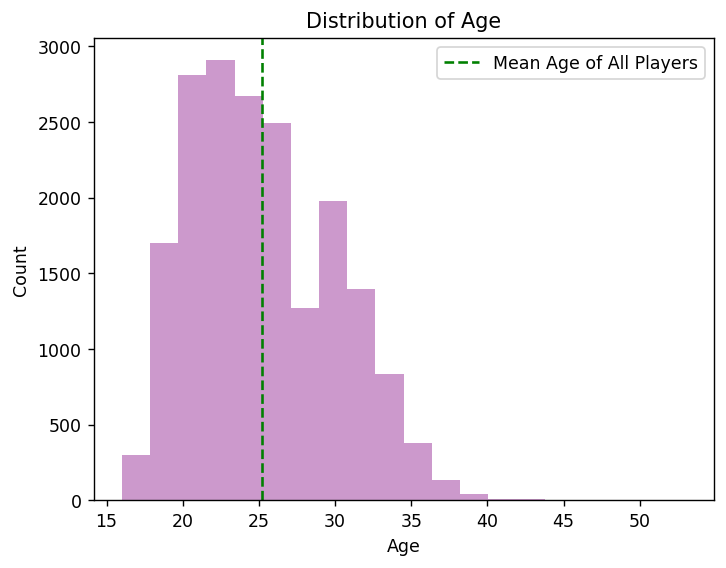

In [63]:
#En el histograma vemos la distribución de edad de los jugadores y tenemos una edad promedio de 25.22

plt.figure(dpi=125)
sns.distplot(a=fifa21['age'],kde=False,bins=20,color='purple')
plt.axvline(x=np.mean(fifa21['age']),c='green',ls='--',label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
print('Mean Age of All Players:',np.mean(fifa['age']))
plt.show()

In [64]:
#cuantos jugadores hay por pais?
fifa21['nationality'].value_counts()

England             1685
Germany             1189
Spain               1072
France               984
Argentina            936
                    ... 
Saint Lucia            1
Papua New Guinea       1
Aruba                  1
Chad                   1
Nicaragua              1
Name: nationality, Length: 162, dtype: int64

<AxesSubplot:>

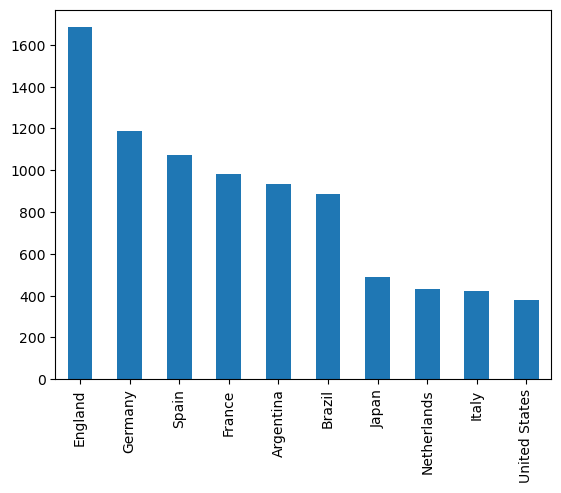

In [65]:
#Filtro algunos paises
algunos_paises = fifa21['nationality'].value_counts()[0:10]
algunos_paises
algunos_paises.plot.bar()


Busco outliers/valores atipicos

In [66]:
players_overall = fifa21[["short_name", "overall"]]
players_overall.head()
players_overall.nlargest(3,"overall")


,short_name,overall
0,L. Messi,93
1,Cristiano Ronaldo,92
2,J. Oblak,91


In [67]:
#Acá considero que hay un outlier en cuanto al salario que gana Messi ya que este es superior al resto
players_wage = fifa21[["short_name", "wage_eur"]]
players_wage.head()
players_wage.nlargest(3,"wage_eur")

,short_name,wage_eur
0,L. Messi,560000
5,K. De Bruyne,370000
15,K. Benzema,350000


In [ ]:
players_wage.plot(x ='short_name', y='wage_eur', kind = 'scatter', figsize=(15, 10))

In [ ]:
players_value = fifa21[["short_name", "value_eur"]]
players_value.head()
players_value.nlargest(3,"value_eur")

In [ ]:
#filtro las alturas de los jugadores
players_heights = fifa21[["short_name", "height_cm"]]
players_heights.head()

In [ ]:
#Top 10 Jugadores más altos
players_heights.nlargest(10, "height_cm")

In [ ]:
#Jugadores más altos en un gráfico, se puede ver perfectamente un outlier arriba a la izquierda
Jugadores_mas_altos = players_heights.nlargest(10, "height_cm")
Jugadores_mas_altos.plot(x ='short_name', y='height_cm', kind = 'scatter', figsize=(15, 10))

In [ ]:
#disparo de los jugadores
player_shooting = fifa21[['short_name', 'shooting']]

In [ ]:
player_shooting.sort_values(by = ['shooting'], ascending = False).head()

In [ ]:
#Hago un agrupamiento de los jugadores con su edad, potencial y nacionalidad
fifa21.groupby(["nationality","age", "potential"]).short_name.agg("unique")

In [ ]:
#Con este filtro podemos ver que el que tiene el puntaje más alto es Messi con 93 puntos
fifa21[fifa21.overall==93]

In [ ]:
#Cuantas ligas hay? Cuantos jugadores tiene cada liga?
print(fifa21['league_name'].nunique())
fifa21['league_name'].value_counts()

In [ ]:
#Cuanto puntaje tiene en total cada país?
puntaje_por_pais =fifa.groupby("nationality").sum()["overall"].to_frame()
puntaje_por_pais.sort_values(axis=0,ascending=False,by=['overall'])

In [ ]:
#Veamoslo mejor en un gráfico de barras con algunos paises
puntaje_por_pais.head(30).plot(kind='bar')

In [ ]:
#Salario de los jugadores
wage_by_player = fifa21[['short_name', "wage_eur"]].sort_values(by=['wage_eur'],ascending=False)
wage_by_player

In [ ]:
#Para un análisi mas profundo, me interesaba saber que pie es preferido para pegarle a la pelota, lo grafico para verlo con mas claridad
plt.figure(dpi=125)
sns.countplot('preferred_foot',data=fifa21,palette='Reds')
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.title('Count of Preferred Foot')
Right,Left=fifa21.preferred_foot.value_counts()
print('Left Preferred',Left)
print('Right Preferred',Right)
plt.show()

Messi vs Ronaldo


In [ ]:
#Comparo a Messi con Ronaldo y vemos que según FIFA21 Messi es mejor que Ronaldo
column_r=['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic', "wage_eur"]
rival = fifa21.head(2)[column_r]
rival= rival.set_index('short_name')
rival.head()


In [ ]:
skills = ['pace',
 'shooting',
 'passing',
 'dribbling',
'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

In [ ]:
data = fifa21

In [ ]:
messi = fifa21.loc[fifa21['short_name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns = skills)
ronaldo = fifa21.loc[data['short_name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)



plt.figure(figsize=(15,8))
sns.pointplot(data=messi,color='blue',alpha=0.6)
sns.pointplot(data=ronaldo, color='red', alpha=0.6)


plt.xticks(rotation=90)
plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Messi vs Ronaldo', fontsize = 25)
plt.grid()

Argentina

In [ ]:
#Me interesaba ver los jugadores de Argentina, sus edades, cuando nacieron, cuanto miden, donde juegan, su potencial, entre otros datos. Jugadores de Argentina:
Argentina = fifa21[fifa21['nationality'] == 'Argentina']
Argentina

In [ ]:
#Filtramos por los jugadores más altos de Argentina con sus otros datos
Argentina.sort_values(by = ['height_cm'], ascending = False).head()

In [ ]:
#Los jugadores con más peso de Argentina y sus datos
Argentina.sort_values(by = ['weight_kg'], ascending = False).head()

In [ ]:
# Los jugadores Argentinos con más salarios y el resto de sus datos
Argentina.sort_values(by = ['wage_eur'], ascending = False).head()

Analizando un poco con las ligas...

In [ ]:
columns = fifa21.columns

In [ ]:
#cantidad de jugadores que tiene Liverpool

players_L = fifa21['club_name'] == 'Liverpool'
fifa21.loc[players_L,['short_name']].count()

In [ ]:
#Promedio de edad en el Manchester City
players_M = fifa21['club_name'] == 'Manchester City'
fifa21.loc[players_M,['age']].mean()

In [ ]:
#Puntaje más alto en el Chelsea
players_C = fifa21['club_name'] == 'Chelsea'
fifa21.loc[players_C,['overall']].max()

In [ ]:
#Salario más alto  en el FC Barcelona

players_C = fifa21['club_name'] == 'FC Barcelona'
fifa21.loc[players_C,['wage_eur']].max()